# 01_DimRed_Ex4 : PCA

## Exercise 4: Outlier detection

The goal of the exercise is to use PCA to detect the outlier on a toy dataset.

In [1]:
# First we import the libraries 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

 ## Dataset 
 
 ###  Dataset creation
 The toy dataset is a matrix that contains 2 features ($x$ and $y$) and 100 samples. 
 
 For the first 95 samples, $x_{\mathrm{true}}$ is in the range $[0, 10]$ and $y_{\mathrm{true}} = 4x + 2 + \epsilon_{\mathrm{true}}$, where $\epsilon_{\mathrm{true}}$ is Gaussian noise with $\mu_{\mathrm{true}} = 0 $ and $\sigma_{\mathrm{true}} = 2.5$
 
 The last 5 points are outliers with $x_{\mathrm{out}}$ is in the range $[2, 3]$ and $y_{\mathrm{out}} = 3 x^2 + x + 10 + \epsilon_{\mathrm{out}}$, where $\epsilon_{\mathrm{out}}$ is Gaussian noise with $\mu_{\mathrm{out}} = 0 $ and $\sigma_{\mathrm{out}} = 5$
 
 - To do:
      - Create n_true = 95 samples with 
               - x_true in range [0 ,10] and 
               - y_true = 4*x_true + 2 + noise_true
      - Create n_outl =  5 samples with:
               - x_outl in range [2 , 3] 
               - y_outl = 3*x_outl**2 + x_outl + 10 + noise_outl
               
 - Hint:
     - to create a evenly spaced array, you can use the function `np.linspace(start, stop, n_points)`
     - to create the noise array, you can use the function `np.random.normal(mu, sigma, size=n_points)`
     - We set a fixed seed for random sampling so that the same result is obtained when re-running the code: `np.random.seed(1)`


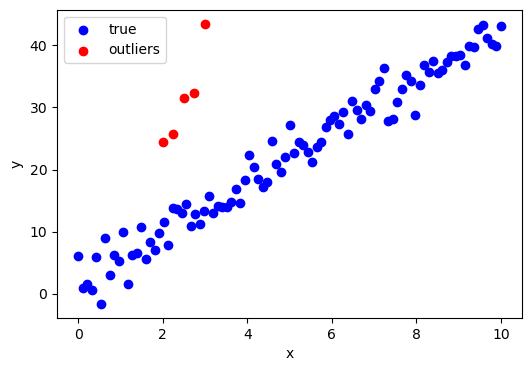

In [2]:
n_true = 95
n_outl = 5

# Fixed seed for random sampling
np.random.seed(1) 

# create noise_true and noise_outl
noise_true = np.random.normal(0, 2.5, size= n_true)
noise_outl = np.random.normal(0, 5. , size= n_outl)

# create x_true and y_true
x_true = np.linspace(0,10,n_true)
y_true = 4*x_true + 2 + noise_true

# create x_outl and y_outl
x_outl = np.linspace(2,3,n_outl)
y_outl = 3*x_outl**2 + x_outl + 10 + noise_outl

# Uncomment to plot
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x_true, y_true, c='b', label='true')
ax.scatter(x_outl, y_outl, c='r', label='outliers')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

 ### Arrange dataset
Now that we have computed the correct values and the outliers, we have to put them in a single dataset, so that we simulate a dataset that has been corrupted with outliers.

 - To do: 
     - Create an empty matrix $\mathbf{M_0}$ of size (n, 2), where $n = n_{\mathrm{true}} + n_{\mathrm{outl}}$
     - Insert the true and outliers values in the matrix, using column 0 for x and column 1 for y
         \begin{gather}
            \mathbf{M_0} = 
            \begin{bmatrix}
            x_1 & y_1 \\
            x_2 & y_2  \\
            \vdots \\
            x_N & y_N \\
            \end{bmatrix}
            \end{gather}
               
 - Hint:
     - You can use the function `np.empty((n, 2)` to create an empty matrix
     - You can use `np.concatenate([a, b]` to concatenate two vectors called a and b

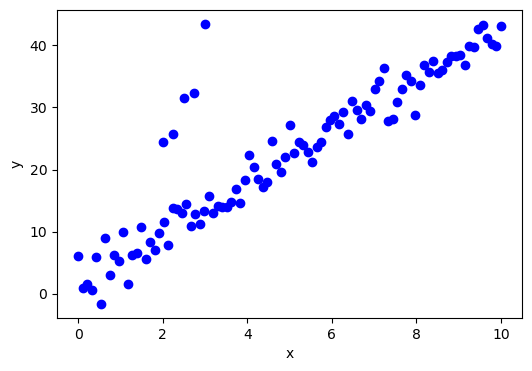

In [3]:
# Create an empty matrix M0
n= n_true + n_outl
M0 = np.empty((n, 2))

# Insert x in column 0 and y in column 1 for both datasets (true +outl)
x = np.concatenate([x_true, x_outl])
y = np.concatenate([y_true, y_outl])

M0[:,0]= x
M0[:,1]= y

# # Uncomment to plot
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(M0[:,0], M0[:,1], c='b')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

 ## PCA
 
 ### Perform PCA

Now we need to perform PCA on the data matrix, and we use the implementation on the scikit-learn library.
Before doing PCA, we center and scale the matrix (you can try and see what happens if you don't do it).

- To do:
    - Center and scale (from matrix $\mathbf{M_0}$ to $\mathbf{M}$) :
        - To center, subtract the mean of each column from each column
        - To scale, divide each column of the centered matrix by the standard deviation of each column
    - Perform PCA
    - Compute the eigenvalues, eigenvectors, PC scores
    - Plot the scores
    - What happens if we dont center and scale?

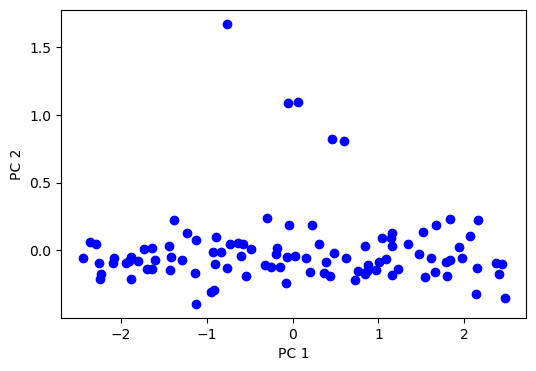

In [4]:
from sklearn.decomposition import PCA

# center and scale
c = np.mean(M0,axis=0) # centering vector
d = np.std(M0,axis=0)  # scaling vector

M =( M0 - c )/ d

# perform PCA
pca = PCA()
pca.fit(M)

# compute eigenvalues, eigenvectors, PC scores
L = pca.singular_values_**2 #the eigenvalues are the singular values squared
A = pca.components_.T
Z = M @ A

# Plot the scores
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(Z[:,0], Z[:,1], c='b')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
plt.show()

 ### Build a classifier from PCA
To find the outliers, we build a classifier using the 2nd PC. To do that, we compute the empirical cumulative distribution function (ecdf) of PC scores squared divided by the corresponding eigenvalue (Mahalanobis distance):

\begin{equation}
d_{i, 2} = \frac{z^2_{i,2}}{l_2}
\end{equation}

\begin{equation}
\mathrm{edfc}(T) = \frac{ \sum_{i = 1}^k d_{i,2} < T }{k}
\end{equation}

- To do:
    - Calculate the Mahalanobis distance using PC2 
    - Compute the cumulative distribution
    - Set a threshold ($T$)

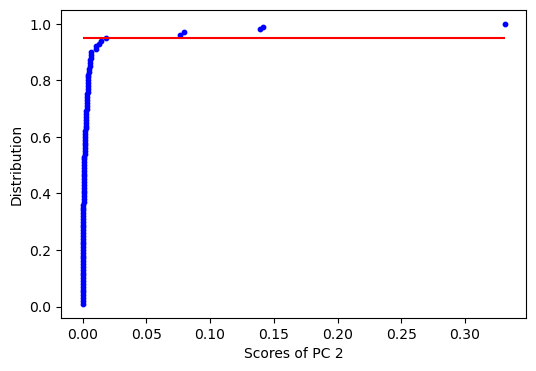

In [5]:
# Calculate Mahalanobis distance 
d_PC2 = Z[:,1]**2/L[1]

# Compute the cumulative distribution
def ecdf(x):
    i_sort = np.argsort(x)
    x_sort = x[i_sort]
    y_sort = np.arange(1, x_sort.size+1)/x_sort.size
    return i_sort, x_sort, y_sort

# x_sort is the d_PC2 sorted in increasing order
# y_sort is the cumulative distribution

i_sort, x_sort, y_sort = ecdf(d_PC2)


# Set a threshold
T = 0.95

# Uncomment to plot
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x_sort, y_sort, c='b', s=10)
ax.set_xlabel('Scores of PC 2')
ax.set_ylabel('Distribution')
ax.hlines(T, x_sort.min(), x_sort.max(), color='r')
plt.show()

 ### Identify the outliers with PCA
 
 From the cumulative distribution, we can define the points above a certain threshold as outliers.
 - To do:
     - Apply the threshold to find the outliers
 - Hint: create a mask:
     - `mask = a >b` create a boolean array that follows the condition we impose. That is, true for each point $a_i > b$ and false for $a_i <= b$
     - `a[mask]`  will return the values of a that satisfy the condition imposed
     - `a[~mask]` will return the values of a that DON'T  satisfy the condition imposed

In [16]:
# Example of how to use a mask

a = np.array([ 5, 6, -1 , -2, 0])

mask_a= a > 0

a_true  = a[mask_a]
a_false = a[~mask_a]

print(f'     a  = {a}\n')
print(f'mask_a  = {mask_a}')
print(f'a_true  = {a_true}')
print(f'a_false = {a_false}')

     a  = [ 5  6 -1 -2  0]

mask_a  = [ True  True False False False]
a_true  = [5 6]
a_false = [-1 -2  0]


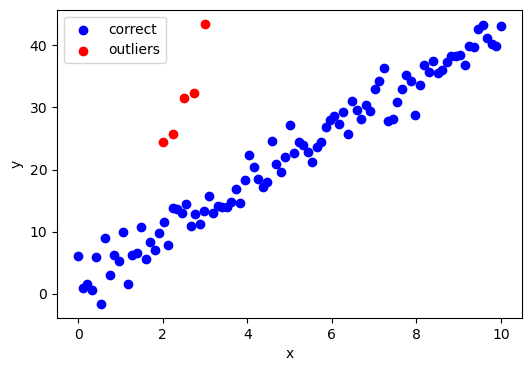

In [7]:
# Uncomment to find the outliers
T= 0.95
mask = y_sort > T

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(M0[i_sort[~mask], 0], M0[i_sort[~mask], 1], c='b', label='correct')
ax.scatter(M0[i_sort[mask], 0] , M0[i_sort[mask], 1] , c='r', label='outliers')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()